# Train diabetes classification model

This notebook reads a CSV file and trains a model to predict diabetes in patients. The data is already preprocessed and requires no feature engineering.

The evaluation methods were used during experimentation to decide whether the model was accurate enough. Moving forward, there's a preference to use the autolog feature of MLflow to more easily deploy the model later on.

## Read data from local file



In [1]:
import pandas as pd

print("Reading data...")
df = pd.read_csv('diabetes.csv')
df.head()

Reading data...


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


## Split data

In [2]:
print("Splitting data...")
X, y = df[['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']].values, df['Diabetic'].values

Splitting data...


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Train model

In [4]:
from sklearn.linear_model import LogisticRegression

print("Training model...")
model = LogisticRegression(C=1/0.1, solver="liblinear").fit(X_train, y_train)

Training model...


## Evaluate model

In [5]:
import numpy as np

y_hat = model.predict(X_test)
acc = np.average(y_hat == y_test)

print('Accuracy:', acc)

Accuracy: 0.7736666666666666


In [6]:
from sklearn.metrics import roc_auc_score

y_scores = model.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores[:,1])

print('AUC: ' + str(auc))

AUC: 0.8483631026419224


Text(0.5, 1.0, 'ROC Curve')

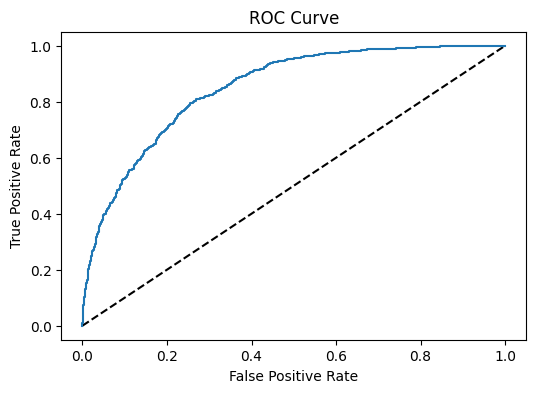

In [7]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 4))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')